# Step 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import librosa
audio_path = 'DATA/Samp_Jap_01.wav'
#'DATA/Naruto_Eng_EP.1.v1.wav'
x , sr = librosa.load(audio_path)

In [8]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

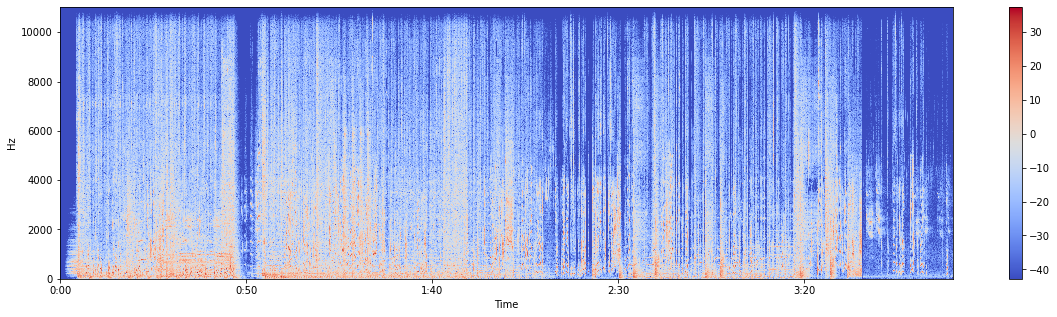

In [9]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

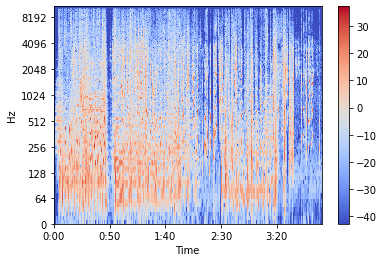

In [10]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [12]:
plt.figure(figsize=(20,5))
x, fs = librosa.load(audio_path)

<Figure size 1440x360 with 0 Axes>

In [ ]:
librosa.display.waveplot(x, sr=sr)

(20, 10336)


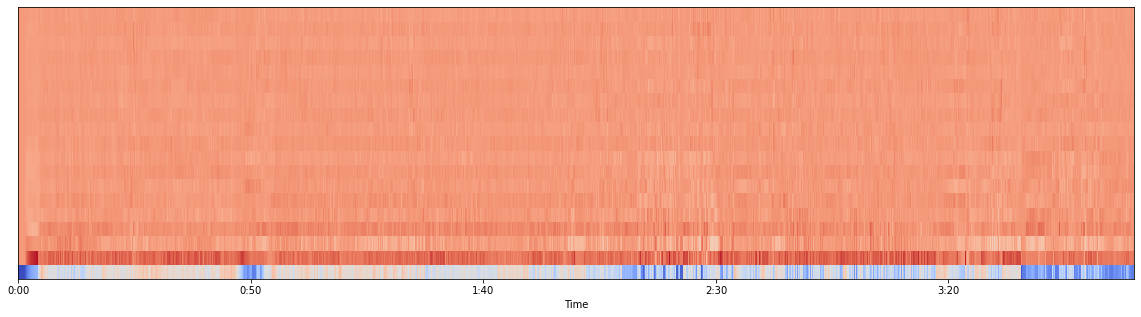

In [13]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(x, sr=sr, n_mfcc = 40)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [14]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 1.1810208e-08 -5.9051040e-09  1.1810208e-08  1.1810208e-08
  1.1810208e-08  5.9051040e-09 -4.4288280e-09  8.8576559e-09
 -2.9525520e-09  5.9051040e-09  2.9525520e-09  7.3813800e-09
  1.4762760e-08  5.9051040e-09 -2.9525520e-09 -5.9051040e-09
  5.9051040e-09  4.4288280e-09 -9.5957944e-09 -2.9525520e-09]
[0.9999999 1.        1.        1.        1.        1.0000002 0.9999998
 1.        1.        1.        1.        1.        1.        1.
 1.0000001 1.        0.9999999 1.        1.        1.       ]


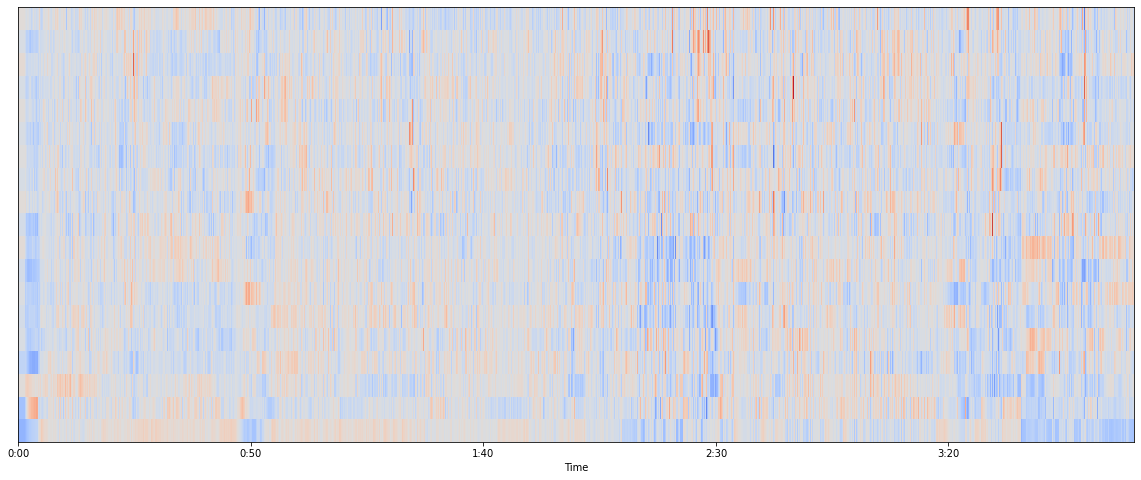

In [15]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

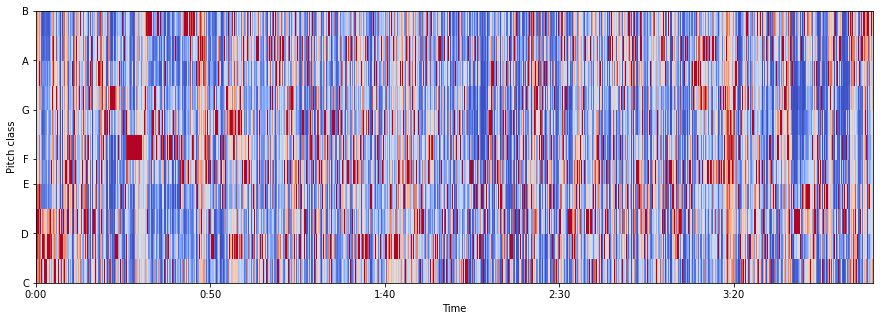

In [16]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [19]:
!pip3 install pydub

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [24]:
from pydub import AudioSegment
import numpy as np

# Load files
audio_segment = AudioSegment.from_file(audio_path)

# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 1
Sample width: 2
Frame rate (sample rate): 44100
Frame width: 2
Length (ms): 240000
Frame count: 10584000.0
Intensity: -28.151238195538383


[Text(0.5, 1.0, 'log Power spectrogram')]

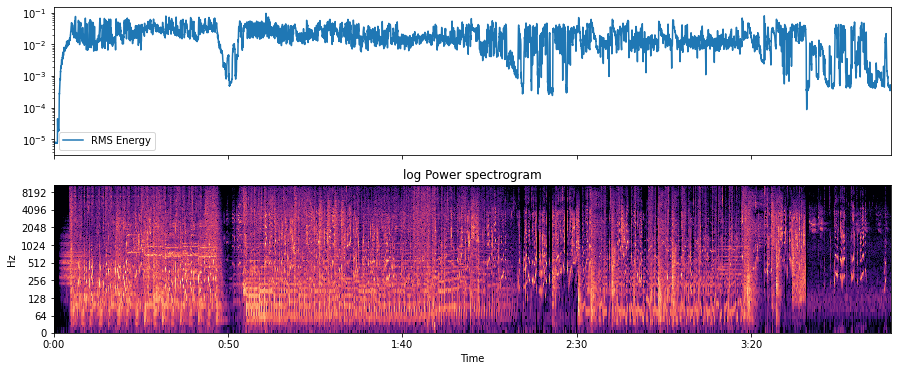

In [23]:
S, phase = librosa.magphase(librosa.stft(x))
rms = librosa.feature.rms(S=S)
# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

TypeError: 'AxesSubplot' object does not support item assignment

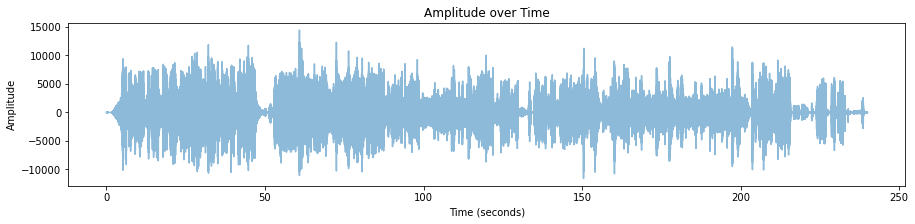

In [25]:
import wave
# Open wav file and read frames as bytes
sf_filewave = wave.open(audio_path, 'r')
signal_sf = sf_filewave.readframes(-1)
# Convert audio bytes to integers
soundwave_sf = np.frombuffer(signal_sf, dtype='int16')
# Get the sound wave frame rate
framerate_sf = sf_filewave.getframerate()
# Find the sound wave timestamps
time_sf = np.linspace(start=0,
                      stop=len(soundwave_sf)/framerate_sf,
                      num=len(soundwave_sf))
# Set up plot
f, ax = plt.subplots(figsize=(15, 3))
# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')
# Add the audio data to the plot
ax[0] = plt.plot(time_sf, soundwave_sf, label='Warm Memories', alpha=0.5)
plt.legend()
plt.show()


In [32]:
print(mfccs.shape)

(20, 10336)


In [ ]:
mfccs1 = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier # decision tee algorithm for classification
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from xgboost import XGBClassifier
import pickle

In [36]:
rf = RandomForestClassifier(n_estimators=90, criterion='entropy')
lr = LogisticRegression()

def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['bayes'] = GaussianNB()
	models['svm_Linear'] = SVC(kernel='linear')
	models['svm_Polly'] = SVC(kernel='poly')
	models['svm_RBF'] = SVC(kernel='rbf')
	models['svm_Sigmoid'] = SVC(kernel='sigmoid')
	#models['Decision_Tree'] = DecisionTreeClassifier()
	models['dt_ent'] = DecisionTreeClassifier(criterion='entropy')
	models['dt_gini'] = DecisionTreeClassifier(criterion='gini')
	models['rf'] = RandomForestClassifier(n_estimators=90, criterion='entropy')
	models['adaboost'] = AdaBoostClassifier(base_estimator=lr, n_estimators=2)
	#models['stacking'] = get_stacking()
	return models

In [34]:
import numpy as np

def evaluate_model_Multi(model, X, y):
  mc=20
  acc = [] ### Blank vector
  f = []
  prec = []
  rec = []
  for i in range(mc):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=i)# split dataset
    dt = model.fit(X_train,y_train) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
    f1 = f1_score(y_test, YPred, average='weighted')
    precision = precision_score(y_test, YPred, average='weighted')
    recall = recall_score(y_test, YPred, average='weighted')
    f.append(f1)
    prec.append(precision)
    rec.append(recall)
    return np.mean(acc), dt, np.mean(recall), np.mean(prec),np.mean(f)

In [37]:
from numpy import mean, std
import warnings
warnings.filterwarnings("ignore")
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores, mod, prec, recall,fscore = evaluate_model_Multi(model,X_over,y_over)#, X, y)
	results.append(scores)
	names.append(name)
	filename = 'Models/'+name+'.pkl'
	pickle.dump(mod, open(filename, 'wb'))
	print(name,'-- accuracy:', mean(scores), '-- Deviation',std(scores),'-- Precision ', mean(prec),'-- Recall', mean(recall),'-- Fscore:', mean(fscore))


NameError: name 'X_over' is not defined

In [42]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
#from keras.optimizers import Adam
#from keras.utils import to_categorical

In [9]:
import librosa
import numpy as np

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed

In [ ]:
import glob, os
import pandas as pd

feature = []
features_X = []
features_y = []
files = 'DATA'

for file in os.listdir(files):
    if 'Jap' in file:
        data_y = extract_features(files+'/'+file)
        features_y.append(data_y)
    elif 'Eng' in file:
        data_X = extract_features(files+'/'+file)
        features_X.append(data_X)

In [37]:
print(len(features_X))
for i in range(len(features_X)):
    #print(features_X[i])
    feature.append([features_X[i],features_y[i]])

5


In [38]:
featuresdf = pd.DataFrame(feature, columns=['English','Japnish'])
featuresdf.head()

,English,Japnish
0,"[-288.95416, 83.35485, -17.47974, 16.071093, -...","[-308.74902, 100.59487, -17.022278, 21.098352,..."
1,"[-268.6041, 87.1773, -14.676921, 21.042276, -5...","[-330.25882, 85.671036, -11.808183, 22.29792, ..."
2,"[-313.7994, 85.86527, -14.585272, 24.691086, -...","[-267.00092, 91.10156, -21.79803, 33.01217, -7..."
3,"[-334.3262, 52.563305, -76.203026, -24.175077,...","[-312.81073, 89.18473, -17.97671, 20.076101, -..."
4,"[-366.3916, 50.863667, -56.42406, -25.23505, -...","[-309.92175, 94.713585, -15.673424, 23.18922, ..."


In [41]:
# split the dataset 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(featuresdf['English'], featuresdf['Japnish'], test_size=0.2, random_state = 127)

In [46]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [47]:
from keras.layers import MaxPooling1D,Conv1D,Flatten

In [49]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=5, input_shape=(40, 6)))
  model.add(MaxPooling1D(pool_size=5 ))
  model.add(Flatten())
  model.add(Dense(hidden_units1, kernel_initializer='normal', activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(hidden_units2, kernel_initializer='normal', activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(hidden_units3, kernel_initializer='normal', activation='relu')),
  model.add(Dense(1, kernel_initializer='normal', activation='linear'))
  return model
# build the model
model = build_model_using_sequential()

In [50]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train, 
    y_train, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
x_test['prediction'] = model.predict(x_test)

In [ ]:
import json
import pandas as pd
import os, glob

chunk = 'chunked'

Input=[]
Output=[]
in_file=[]
out_file=[]
input_df = pd.DataFrame()
output_df = pd.DataFrame()

dirs = ['chunked/Input','chunked/Output']
tot_file = 0
#for dir in dirs:
#dir = dirs[0]
#os.chdir(dir)
#for file in glob.glob("*.wav"):
#chunk = 'chunked'
run_once = 0

for subdir, dirs, files in os.walk(chunk):
  #for dir in dirs:
  #print(subdir)
  #while 1:
    #print(os.listdir(os.path.join(subdir, dir)))
    #if run_once == 0:
  for each_file in os.listdir(os.path.join(subdir, dirs[0])):
      #print(each_file)
        if ('.wav' in each_file):
        #if 'Jap' in each_file: 
          #print(os.path.join(subdir,dir,each_file))
          #print(os.path.join(subdir,dirs[0],each_file))
          in_file.append(each_file)
          Input.append(feature(os.path.join(subdir,dirs[0],each_file)))      
          input_df = input_df.append(pd.DataFrame([feature(os.path.join(subdir,dirs[0],each_file))]), ignore_index=True)
          #elif 'Eng' in each_file:
          out1 = dirs[0].replace("Input", "Output")
          out = each_file.replace('Jap','Eng')
          #out_file.append(each_file)
          #Output.append(feature(os.path.join(dir,each_file)))      
          #output_df = output_df.append(pd.DataFrame([feature(os.path.join(subdir,dir,each_file))]), ignore_index=True)
          out_file.append(out)
          Output.append(feature(os.path.join(subdir,out1,out)))
          output_df = output_df.append(pd.DataFrame([feature(os.path.join(subdir,out1,out))]), ignore_index=True)
          tot_file+=1
          run_once = 1
print('Done',tot_file)